# Participles

## Create Dataframe

In [1]:
from test import test
import sys
sys.path.append('..')
import action

handle = open("new_examples.txt", "r")
text = handle.read()
handle.close()
list_, N = [0], 0
for i in range(len(text)):
    if text[i] == '.':
        last = i
    N += 1
    if N > 10000:
        list_.append(last)
        N = 0
        
root_list = []
for i in range(len(list_) - 1):
    root_list = root_list + action.construct_tree(text[list_[i] : list_[i + 1]])

list_ = test(root_list)

/home/ased/anaconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/ased/anaconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
def sub(name, list_):
    if name in list_:
        return 1
    return 0

dict_ = dict()
keys_1 = ['case', 'punct', 'nmod', 'advmod', 'parataxis', 'obl', 'nsubj', 'obj', 'ccomp', 'nsubj:pass', 'cc', 'det', 'iobj', 'advcl', 'aux:pass', 'mark', 'conj', 'discourse', 'acl:relcl']
keys_2 = ['ADJ', 'SCONJ', 'AUX', 'ADP', 'DET', 'PUNCT', 'NOUN', 'CCONJ', 'ADV', 'PROPN', 'VERB', 'PRON', 'PART', 'NUM']
keys_3 = ['ParentPROPN', 'ParentNUM', 'ParentNOUN', 'ParentVERB', 'ParentNon', 'ParentAUX', 'ParentPUNCT', 'ParentPRON']

dict_['Sentence'], dict_['Lemma'], dict_['Token'] = [], [], []
for i in (keys_1 + keys_2 + keys_3):
    dict_[i] = []
for i in list_:
    dict_['Sentence'].append(i[0])
    dict_['Lemma'].append(i[1])
    dict_['Token'].append(i[2])
    for j in keys_1:
        dict_[j].append(sub(j, [k[1] for k in i[3]]))
    for j in keys_2:
        dict_[j].append(sub(j, [k[0].value.postag for k in i[3]]))
    for j in keys_3:
        dict_[j].append(sub('Parent' + i[4], [j]))
import pandas as pd
df = pd.DataFrame(data = dict_)
df.to_csv('Part_2.csv', index = False, encoding = 'utf')

## Visualisation Of Marked Data

In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv('Part_mark_2.csv')
del df['Sentence']
del df['Lemma']
del df['Token']
y = df['Answer']
del df['Answer']
array = df.as_matrix()
print(array.shape)

(248, 41)


/home/ased/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


(248, 2)


<IPython.core.display.Javascript object>


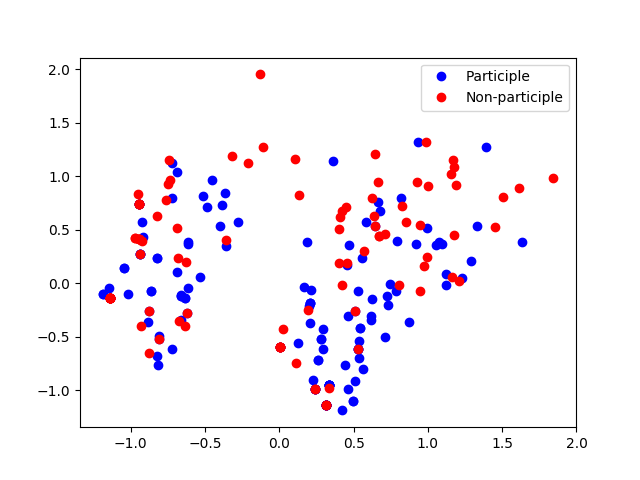

149


In [6]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

% matplotlib notebook
data = array.copy()
pca = PCA(n_components = 2)
pca.fit(data)
data =pca.transform(data)
print(data.shape)
plt.plot([data[i][0] for i in range(data.shape[0]) if y[i] == 1],
         [data[i][1] for i in range(data.shape[0]) if y[i] == 1],
         'bo')
print(len([data[i][0] for i in range(data.shape[0]) if y[i] == 1]))
plt.plot([data[i][0] for i in range(data.shape[0]) if y[i] == 0],
         [data[i][1] for i in range(data.shape[0]) if y[i] == 0],
         'ro')

plt.legend(['Participle', 'Non-participle'])


<IPython.core.display.Javascript object>


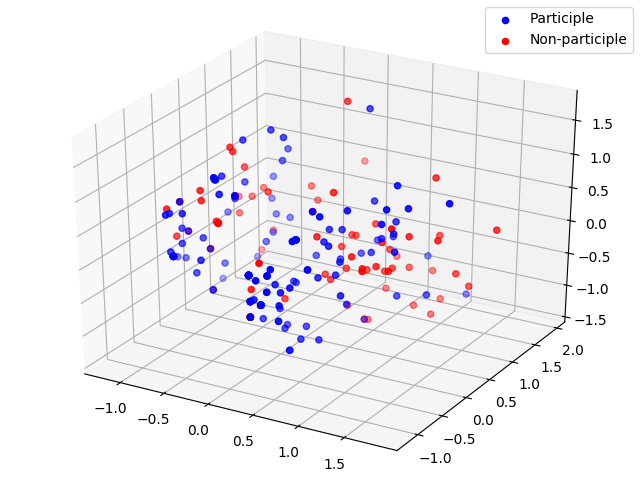

In [5]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LinearSegmentedColormap
% matplotlib notebook
pca = PCA(n_components = 3)
data = array.copy()
pca.fit(data)
data =pca.transform(data)
fig = plt.figure()
ax = Axes3D(fig)
xs = [data[i][0] for i in range(data.shape[0]) if y[i] == 1]
ys = [data[i][1] for i in range(data.shape[0]) if y[i] == 1]
zs = [data[i][2] for i in range(data.shape[0]) if y[i] == 1]
ax.scatter(xs, ys, zs, c = 'b')

xs = [data[i][0] for i in range(data.shape[0]) if y[i] == 0]
ys = [data[i][1] for i in range(data.shape[0]) if y[i] == 0]
zs = [data[i][2] for i in range(data.shape[0]) if y[i] == 0]
ax.scatter(xs, ys, zs, c= 'r')
plt.legend(['Participle', 'Non-participle'])


## KNN

In [10]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score as cvs

data = array.copy()
Y = y
est = KFold(shuffle = True, n_splits = 6)
clf = KNN(n_neighbors = 4)
precision = ( np.mean(cvs(clf, data, Y, cv = est, scoring = 'precision')))
recall = precision = ( np.mean(cvs(clf, data, Y, cv = est, scoring = 'recall')))
print(precision, recall)

0.6371900818486349 0.6371900818486349


## Random Forest

In [8]:
from sklearn.ensemble import RandomForestClassifier as RFC

clf = RFC(n_estimators = 50)
precision = ( np.mean(cvs(clf, data, Y, cv = est, scoring = 'precision')))
recall = precision = ( np.mean(cvs(clf, data, Y, cv = est, scoring = 'recall')))
print(precision, recall)

0.6910816505019404 0.6910816505019404


## Import Model

In [9]:
clf.fit(data, Y)
import _pickle as cPickle
with open('participle_classifier.pkl', 'wb') as fid:
    cPickle.dump(clf, fid)